# Z transform visualization

In [180]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [181]:
import numpy as np
import matplotlib as plt
import math

In [182]:
N = 5
zeros = [0]*N
d_n = zeros
d_n[0] = 1

In [210]:
h_n = [1, 3/4, 1/2, 1/4, 1/8, 0 , 0]

In [211]:
def H_z(h_n,z):
    s = 0
    for i in range(len(h_n)):
        #print(i)
        h = h_n[i]
        #print(f"Index of {h_n[i]} is {i}")
        if z != 0 and i>=0:
            s = s + h*z**(-i)
        else:
            s = s
    return s

In [212]:
# Example
H_z(h_n,complex(1,-1))

(1.28125+0.6875j)

# Generating complex plane

Density is `density`

In [213]:
density = 0.3
xrange = (-5,5)
yrange = (-5,5)
#lower_limit=

In [214]:
X,Y = np.mgrid[-5:5.1:density, -5:5.1:density]
xy = np.vstack((X.flatten(), Y.flatten())).T

In [215]:
import numpy as np
x = np.arange(-10, 10, density)
y = np.arange(-10, 10, density)
X,Y = np.meshgrid(x,y)

In [216]:
xy = np.vstack((X.flatten(), Y.flatten())).T

In [217]:
H_Z = []
for element in xy:
    H_Z.append(H_z(h_n,complex(element[0],element[1])))

In [218]:
z = [np.absolute(h) for h in H_Z]
#zrange = (min(z),max(z))
#zrange = (min(z),3)
if max(z) > max(xrange) - min(xrange):
    zrange = (min(z) , max(xrange))
else:
    zrange = (min(z),max(z))

In [219]:
xcoord = [elem[0] for elem in xy]
ycoord = [elem[1] for elem in xy]

# Plotting

In [220]:
#Mesh
import plotly.graph_objects as go
import plotly.express as px

N = 70

fig = go.Figure(data=[go.Mesh3d(x = xcoord,
                   y = ycoord,
                   z = z,
                   opacity=0.8,
                   color='rgba(244,22,100,0.6)'
                  )])

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=xrange,),
                     yaxis = dict(nticks=4, range=yrange,),
                     zaxis = dict(nticks=4, range=zrange,),),
    width=700,
    margin=dict(r=10, l=10, b=20, t=10))

fig.show()

<IPython.core.display.Javascript object>


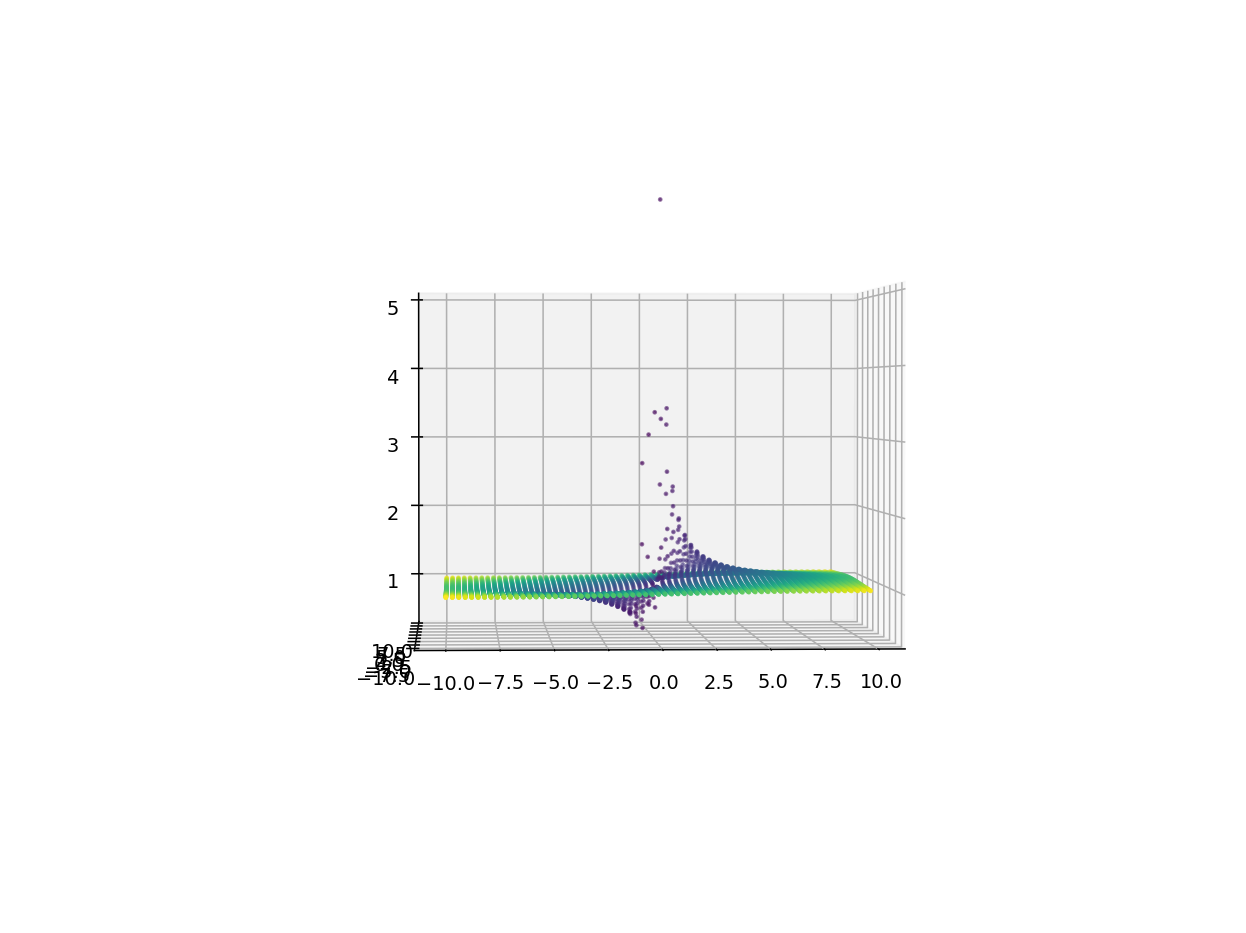

In [221]:
# PLOT data with matplotlib
"""
=============================================
Generate polygons to fill under 3D line graph
=============================================

Demonstrate how to create polygons which fill the space under a line
graph. In this example polygons are semi-transparent, creating a sort
of 'jagged stained glass' effect.
"""

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
#import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
#import numpy as np



fig = plt.figure()



ax = fig.add_subplot(111, projection='3d')

ax.set_zlim3d(*zrange)

# Make data.  ("10k","1000M")
#f_ax = np.linspace( 1e4, 1e9 , num=len(label_complex_np))
#x_axis = np.linspace(0,2, num=len(label_complex_np))

color = np.linalg.norm([xcoord,ycoord] , axis = 0)

ax.scatter( xcoord , ycoord , z, c = color , s = 2  )
#surf = ax.plot_surface(xcoord, ycoord, z, cmap=cm.coolwarm,
#                       linewidth=0.1, antialiased=False)

In [135]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
#z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
#z = z_data.values
#sh_0, sh_1 = z.shape
#x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=xcoord, y=ycoord)])
fig.update_layout(title='Not working plot', autosize=True,
                  width=500, height=500,
                  margin=dict(r=20, l=10, b=10, t=10))
fig.show()